In [32]:
!pip install h5py

In [33]:
#Calcul
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.special import expit
#Importation de notre dataset
from utilities import *

dim X : (100, 2)
dim y : (100, 1)


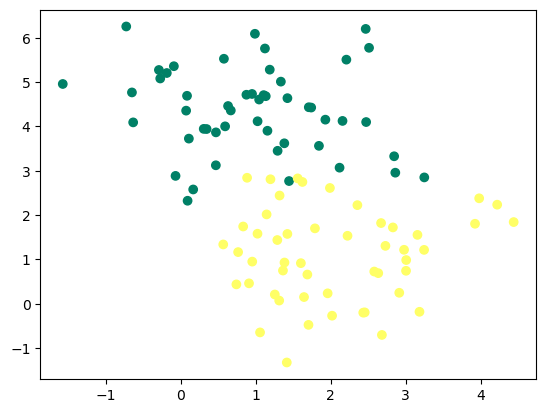

In [34]:
#generer un Dataset:
number_of_arguments = 100
X, y = make_blobs(n_samples=100, n_features=2 , centers=2 , random_state=0)#random state is the seed generating random numbers , with same seed we got same dataset
y=y.reshape((y.shape[0],1))#ça sert pratiquement a rien dans notre cas 
print(f"dim X : {X.shape}")
print(f"dim y : {y.shape}")
#colors = [i for i in range(100)]
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')#if y[i]=c((X[i,0],X[i,1]))=0 it will be displayed in yellow , random state=69 will generate a dataset 'indescernable' ,no good , choose the seed well for a classification problem  
plt.show()

![model](algo.png)

In [35]:
def init_w_b(X):#Z = WX+b
 W = np.random.randn(X.shape[1],1)#random.randn(d0, d1, ..., dn)d0, d1, …, dn : int, optional (The dimensions of the returned array, must be non-negative. If no argument is given a single Python float is returned.)
 b = np.random.randn(1)
 return (W, b)

In [36]:
def model(X, W, b):
 Z = X.dot(W) + b
 A = 1/(1+np.exp(-Z))
 return A

In [37]:
def LogLoss(A, y):
 m = len(y)
 epsilon = 1e-10 #Eviter le probleme du 0
 return (-1/m)*np.sum(y*np.log(A + epsilon)+(1-y)*np.log(1 - A + epsilon))

In [38]:
def gradients(A,X,y):
    dW=1/len(y) * np.dot(X.T,A-y)
    db=1/len(y) * np.sum(A-y)
    return(dW,db)

In [39]:
def update(dW,db,W,b,learning_rate):
    W=W-learning_rate * dW
    b=b - learning_rate * db
    return(W,b)

In [40]:
def predict(X,W,b):
    A=model(X,W,b)
    return A>=0.5

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
def artificial_neurone(X,y,learning_rate=0.1,n_iter=100):
    W,b=init_w_b(X)
    loss=[]
    for i in range(n_iter):
        A=model(X,W,b)
        loss.append(LogLoss(A,y))
        dW,db=gradients(A,X,y)
        W,b=update(dW,db,W,b,learning_rate)
    y_pred=predict(X,W,b)
    plt.plot(loss)
    plt.show()
    return (W,b)

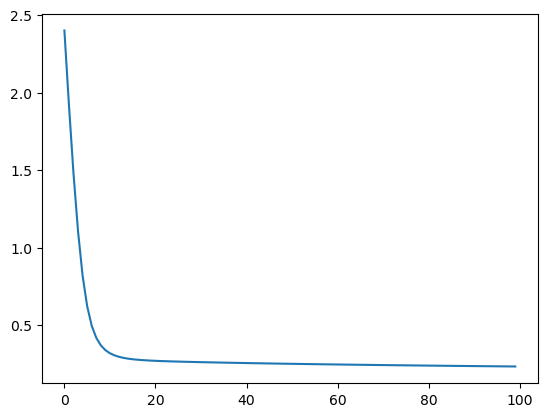

In [43]:
W ,b = artificial_neurone(X,y)

In [44]:
#test
new=np.array([1,2])
predict(new,W,b)


array([False])

# CHAT VS CHIEN

In [45]:
X_train, y_train, X_test, y_test = load_data()

In [46]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [47]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


In [48]:
#the dimensions of the images are not similar to what we had in the previous code 

# on va applatir ces images , la data set d'entrée sera un grande matrice contentant toutes les images , 
#tel que chaque ligne contient tous les pixels de chaque image 

# applatissement 

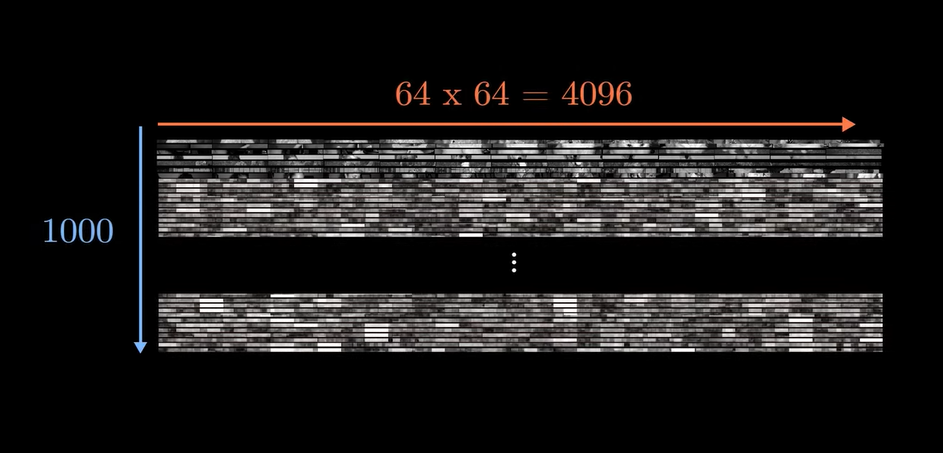

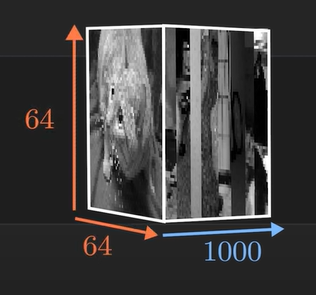

In [49]:
X_train_reshaped=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
print(X_train_reshaped.shape)

(1000, 4096)


In [50]:
X_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print(X_train_reshaped.shape)

(1000, 4096)


C:\Users\ZOUHRI\AppData\Local\Temp\ipykernel_5832\4132131076.py:3: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))


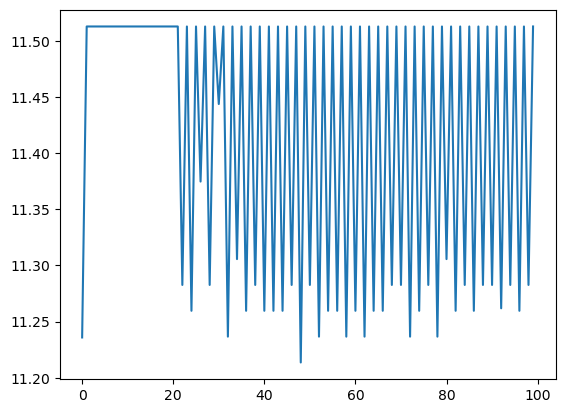

In [51]:
W ,b = artificial_neurone(X_train_reshaped,y_train)

RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z)

  we have to overcome the overflow in exp , due to the existence of Nhuge values in Z , which leads to zeroes  A = 1/(1+np.exp(-Z), which causes  problems in the loglarithm function 
  lets add an epsilon , as small as possible , to avoid having zeroes in A

In [52]:
##eps = 1e-8
## A +eps is added to the logloss function 

C:\Users\ZOUHRI\AppData\Local\Temp\ipykernel_5832\4132131076.py:3: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))


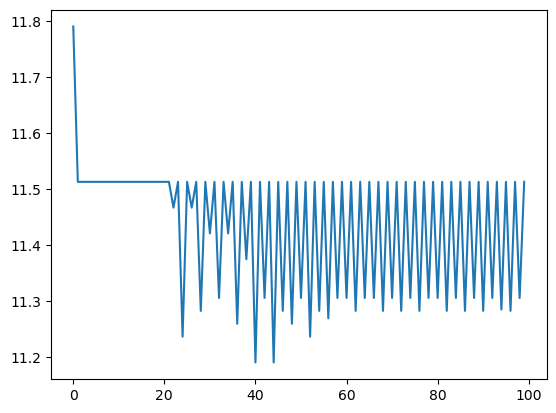

In [53]:
W ,b = artificial_neurone(X_train_reshaped,y_train)

In [54]:
# it still exeists an overflow in exp , and the plot shows that the error (loss) stays very big during the learning process
# quand il y a une grande difference entre les valeurs des coefficients dans la matrice de poids , W , la fonction cout (loss ) se compresse , car les grandes valeurs n'écrasent pas les petites , et l'algo de descente de grad fait des zigzags sans pouvoir minimaliser le cout  
#to fix that  , on va normaliser les données pour que les grandes valeurs n'écrasent pas les petites 


In [55]:
#A_cliped = np.clip(model(X_train_reshaped,W,b),-128,127)
#does not work :(

In [56]:
X_train_reshaped=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])//X_train.max()
print(X_train_reshaped.shape)
print(X_train_reshaped.max())#=1


(1000, 4096)
1


In [57]:
X_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])//X_test.max()
print(X_test_reshaped.max())#=1


1


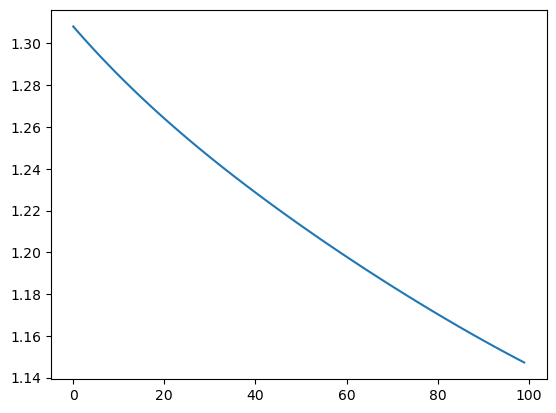

In [58]:
W ,b = artificial_neurone(X_train_reshaped,y_train)

problem solved , now we can lower the learning rate , higher n_iter .... let's also add plot the performance of the model 

In [59]:
def artificial_neurone2(X,y,learning_rate=0.1,n_iter=1000):
    W,b=init_w_b(X)
    loss=[]
    accuracy=[]
    for i in range(n_iter):
        A=model(X,W,b)
        loss.append(LogLoss(A,y))
    
        y_pred=predict(X,W,b)
        accuracy.append(accuracy_score(y,y_pred))

        dW,db=gradients(A,X,y)
        W,b=update(dW,db,W,b,learning_rate)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(loss)
    plt.subplot(1,2,2)
    plt.plot(accuracy)
    plt.show()
    return (W,b)

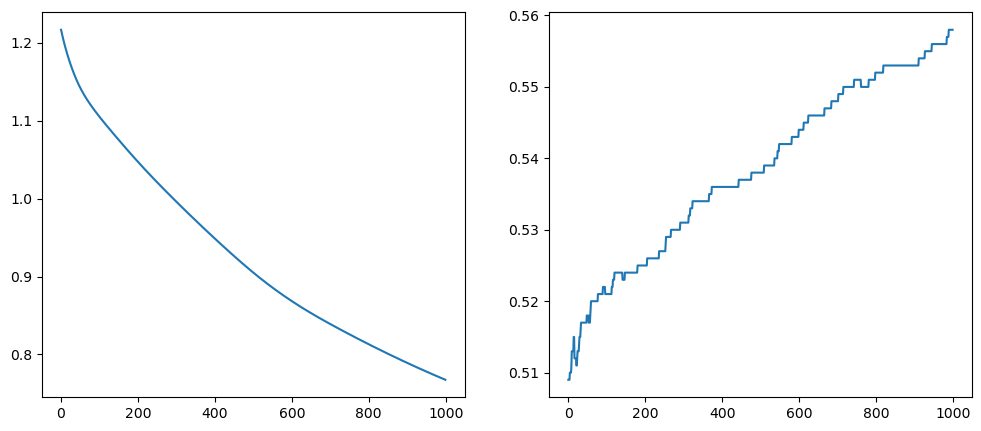

In [60]:
W ,b = artificial_neurone2(X_train_reshaped,y_train)

lets plot the test graphic , to make sure the neurone isn't over learning or overfitting


In [61]:
def artificial_neurone3(X_train,y_train,X_test,y_test,learning_rate=0.05,n_iter=1000):
    W,b=init_w_b(X_train)
    train_loss=[]
    train_accuracy=[]
    test_loss=[]
    test_accuracy=[]
    for i in range(n_iter):
        A=model(X_train,W,b)
        train_loss.append(LogLoss(A,y_train))
    
        y_pred=predict(X_train,W,b)
        train_accuracy.append(accuracy_score(y_train,y_pred))

        #test
        A_test=model(X_test,W,b)
        test_loss.append(LogLoss(A_test,y_test))
        y_pred=predict(X_test,W,b)
        test_accuracy.append(accuracy_score(y_test,y_pred))

        dW,db=gradients(A,X_train,y_train)
        W,b=update(dW,db,W,b,learning_rate)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_accuracy)
    plt.plot(test_accuracy)
    plt.legend()
    plt.show()
    return (W,b)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


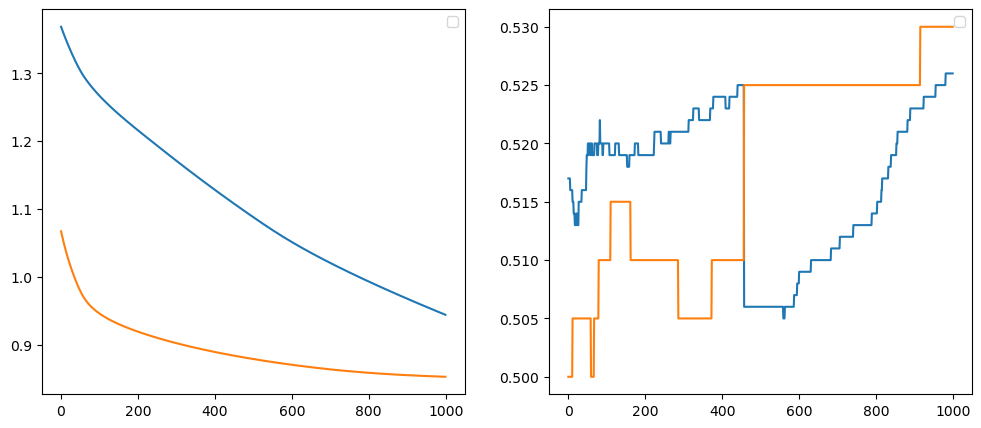

In [62]:
W ,b = artificial_neurone3(X_train_reshaped,y_train,X_test_reshaped,y_test)

well , we can see that we're in an overfitting case !
the neurone focuses in learning more than in generalizing , and it commits much more error in the tests than in the training 

il ya un fléau de la dimension : L'idée générale est que lorsque le nombre de dimensions augmente, le volume de l'espace croît rapidement si bien que les données se retrouvent « isolées » et deviennent éparses. Cela est problématique pour les méthodes nécessitant un nombre significatif de données pour être valides, les rendant alors peu efficaces voire inopérantes.

well to fix that , we can add more data , or lower the number of variables .... but it wouldn't be enough : we have a single neurone , and it's aproximation is linear , it's useful in classification problems , but the problem we're working on is not a classification problem
we have to add more neurones : let's create   un reseau de neurones 